# Hourly Weather Data in Chicago Area
- **Objectives**: In this Notebook we analyze weather data from the Chicago area to identify trends and patterns in relation to bikesharing
- **Source**: https://www.ncei.noaa.gov/orders/cdo/4027464.csv
- **Location**: NCEI/NOAA Weather Data is measured mostly in weather stations in airports, this stations use WMO standards and high-quality & calibrated instruments. There are Five different Airfields/Airport in the Cook County Area, we selected Chicago Midway Airport because it is the most central airport and its surrounded by buildings and thus captures better urban climate effects
 




In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
weather = pd.read_csv('data/Data_Weather_MDW_20190301_20190331.csv')
weather.head()



,STATION,"""DATE""","""REPORT_TYPE""","""SOURCE""","""AWND""","""BackupDirection""","""BackupDistance""","""BackupDistanceUnit""","""BackupElements""","""BackupElevation""","""BackupElevationUnit""","""BackupEquipment""","""BackupLatitude""","""BackupLongitude""","""BackupName""","""CDSD""","""CLDD""","""DSNW""","""DYHF""","""DYTS""","""DailyAverageDewPointTemperature""","""DailyAverageDryBulbTemperature""","""DailyAverageRelativeHumidity""","""DailyAverageSeaLevelPressure""","""DailyAverageStationPressure""","""DailyAverageWetBulbTemperature""","""DailyAverageWindSpeed""","""DailyCoolingDegreeDays""","""DailyDepartureFromNormalAverageTemperature""","""DailyHeatingDegreeDays""","""DailyMaximumDryBulbTemperature""","""DailyMinimumDryBulbTemperature""","""DailyPeakWindDirection""","""DailyPeakWindSpeed""","""DailyPrecipitation""","""DailySnowDepth""","""DailySnowfall""","""DailySustainedWindDirection""","""DailySustainedWindSpeed""","""DailyWeather""","""HDSD""","""HTDD""","""HourlyAltimeterSetting""","""HourlyDewPointTemperature""","""HourlyDryBulbTemperature""","""HourlyPrecipitation""","""HourlyPresentWeatherType""","""HourlyPressureChange""","""HourlyPressureTendency""","""HourlyRelativeHumidity""","""HourlySeaLevelPressure""","""HourlySkyConditions""","""HourlyStationPressure""","""HourlyVisibility""","""HourlyWetBulbTemperature""","""HourlyWindDirection""","""HourlyWindGustSpeed""","""HourlyWindSpeed""","""MonthlyAverageRH""","""MonthlyDaysWithGT001Precip""","""MonthlyDaysWithGT010Precip""","""MonthlyDaysWithGT32Temp""","""MonthlyDaysWithGT90Temp""","""MonthlyDaysWithLT0Temp""","""MonthlyDaysWithLT32Temp""","""MonthlyDepartureFromNormalAverageTemperature""","""MonthlyDepartureFromNormalCoolingDegreeDays""","""MonthlyDepartureFromNormalHeatingDegreeDays""","""MonthlyDepartureFromNormalMaximumTemperature""","""MonthlyDepartureFromNormalMinimumTemperature""","""MonthlyDepartureFromNormalPrecipitation""","""MonthlyDewpointTemperature""","""MonthlyGreatestPrecip""","""MonthlyGreatestPrecipDate""","""MonthlyGreatestSnowDepth""","""MonthlyGreatestSnowDepthDate""","""MonthlyGreatestSnowfall""","""MonthlyGreatestSnowfallDate""","""MonthlyMaxSeaLevelPressureValue""","""MonthlyMaxSeaLevelPressureValueDate""","""MonthlyMaxSeaLevelPressureValueTime""","""MonthlyMaximumTemperature""","""MonthlyMeanTemperature""","""MonthlyMinSeaLevelPressureValue""","""MonthlyMinSeaLevelPressureValueDate""","""MonthlyMinSeaLevelPressureValueTime""","""MonthlyMinimumTemperature""","""MonthlySeaLevelPressure""","""MonthlyStationPressure""","""MonthlyTotalLiquidPrecipitation""","""MonthlyTotalSnowfall""","""MonthlyWetBulb""","""NormalsCoolingDegreeDay""","""NormalsHeatingDegreeDay""","""REM""","""REPORT_TYPE"".1","""SOURCE"".1","""ShortDurationEndDate005""","""ShortDurationEndDate010""","""ShortDurationEndDate015""","""ShortDurationEndDate020""","""ShortDurationEndDate030""","""ShortDurationEndDate045""","""ShortDurationEndDate060""","""ShortDurationEndDate080""","""ShortDurationEndDate100""","""ShortDurationEndDate120""","""ShortDurationEndDate150""","""ShortDurationEndDate180""","""ShortDurationPrecipitationValue005""","""ShortDurationPrecipitationValue010""","""ShortDurationPrecipitationValue015""","""ShortDurationPrecipitationValue020""","""ShortDurationPrecipitationValue030""","""ShortDurationPrecipitationValue045""","""ShortDurationPrecipitationValue060""","""ShortDurationPrecipitationValue080""","""ShortDurationPrecipitationValue100""","""ShortDurationPrecipitationValue120""","""ShortDurationPrecipitationValue150""","""ShortDurationPrecipitationValue180""","""Sunrise""","""Sunset""","""WindEquipmentChangeDate"""
0,72534014819,"""2019-03-01T00:53:00""","""FM-15""","""7""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""30.19""","""18""","""26""","""0.00""",,,,"""71""","""30.23""","""OVC:08 47""","""29.52""","""10.00""","""23""","""330""",,"""5""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""MET10103/01/19 00:53:02 METAR KMDW 010653Z 3...","""FM-15""","""7""",,,,,

In [3]:
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  
#df = pd.read_csv('data/Data_Weather_MDW_20190301_20190331.csv')
display(weather.isnull().mean() * 100)

STATION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               0.0
 "DATE"                                                                                                                                                                                       

In [4]:

#weather = pd.read_csvdw = pd.read_csv('data/Data_Weather_MDW_20190301_20190331.csv')
weather = weather.dropna(thresh=800, axis=1)
weather.head()


,STATION,"""DATE""","""REPORT_TYPE""","""SOURCE""","""AWND""","""BackupDirection""","""BackupDistance""","""BackupDistanceUnit""","""BackupElements""","""BackupElevation""","""BackupElevationUnit""","""BackupEquipment""","""BackupLatitude""","""BackupLongitude""","""BackupName""","""CDSD""","""CLDD""","""DSNW""","""DYHF""","""DYTS""","""DailyAverageDewPointTemperature""","""DailyAverageDryBulbTemperature""","""DailyAverageRelativeHumidity""","""DailyAverageSeaLevelPressure""","""DailyAverageStationPressure""","""DailyAverageWetBulbTemperature""","""DailyAverageWindSpeed""","""DailyCoolingDegreeDays""","""DailyDepartureFromNormalAverageTemperature""","""DailyHeatingDegreeDays""","""DailyMaximumDryBulbTemperature""","""DailyMinimumDryBulbTemperature""","""DailyPeakWindDirection""","""DailyPeakWindSpeed""","""DailyPrecipitation""","""DailySnowDepth""","""DailySnowfall""","""DailySustainedWindDirection""","""DailySustainedWindSpeed""","""DailyWeather""","""HDSD""","""HTDD""","""HourlyAltimeterSetting""","""HourlyDewPointTemperature""","""HourlyDryBulbTemperature""","""HourlyPrecipitation""","""HourlyPresentWeatherType""","""HourlyPressureChange""","""HourlyPressureTendency""","""HourlyRelativeHumidity""","""HourlySeaLevelPressure""","""HourlySkyConditions""","""HourlyStationPressure""","""HourlyVisibility""","""HourlyWetBulbTemperature""","""HourlyWindDirection""","""HourlyWindGustSpeed""","""HourlyWindSpeed""","""MonthlyAverageRH""","""MonthlyDaysWithGT001Precip""","""MonthlyDaysWithGT010Precip""","""MonthlyDaysWithGT32Temp""","""MonthlyDaysWithGT90Temp""","""MonthlyDaysWithLT0Temp""","""MonthlyDaysWithLT32Temp""","""MonthlyDepartureFromNormalAverageTemperature""","""MonthlyDepartureFromNormalCoolingDegreeDays""","""MonthlyDepartureFromNormalHeatingDegreeDays""","""MonthlyDepartureFromNormalMaximumTemperature""","""MonthlyDepartureFromNormalMinimumTemperature""","""MonthlyDepartureFromNormalPrecipitation""","""MonthlyDewpointTemperature""","""MonthlyGreatestPrecip""","""MonthlyGreatestPrecipDate""","""MonthlyGreatestSnowDepth""","""MonthlyGreatestSnowDepthDate""","""MonthlyGreatestSnowfall""","""MonthlyGreatestSnowfallDate""","""MonthlyMaxSeaLevelPressureValue""","""MonthlyMaxSeaLevelPressureValueDate""","""MonthlyMaxSeaLevelPressureValueTime""","""MonthlyMaximumTemperature""","""MonthlyMeanTemperature""","""MonthlyMinSeaLevelPressureValue""","""MonthlyMinSeaLevelPressureValueDate""","""MonthlyMinSeaLevelPressureValueTime""","""MonthlyMinimumTemperature""","""MonthlySeaLevelPressure""","""MonthlyStationPressure""","""MonthlyTotalLiquidPrecipitation""","""MonthlyTotalSnowfall""","""MonthlyWetBulb""","""NormalsCoolingDegreeDay""","""NormalsHeatingDegreeDay""","""REM""","""REPORT_TYPE"".1","""SOURCE"".1","""ShortDurationEndDate005""","""ShortDurationEndDate010""","""ShortDurationEndDate015""","""ShortDurationEndDate020""","""ShortDurationEndDate030""","""ShortDurationEndDate045""","""ShortDurationEndDate060""","""ShortDurationEndDate080""","""ShortDurationEndDate100""","""ShortDurationEndDate120""","""ShortDurationEndDate150""","""ShortDurationEndDate180""","""ShortDurationPrecipitationValue005""","""ShortDurationPrecipitationValue010""","""ShortDurationPrecipitationValue015""","""ShortDurationPrecipitationValue020""","""ShortDurationPrecipitationValue030""","""ShortDurationPrecipitationValue045""","""ShortDurationPrecipitationValue060""","""ShortDurationPrecipitationValue080""","""ShortDurationPrecipitationValue100""","""ShortDurationPrecipitationValue120""","""ShortDurationPrecipitationValue150""","""ShortDurationPrecipitationValue180""","""Sunrise""","""Sunset""","""WindEquipmentChangeDate"""
0,72534014819,"""2019-03-01T00:53:00""","""FM-15""","""7""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""30.19""","""18""","""26""","""0.00""",,,,"""71""","""30.23""","""OVC:08 47""","""29.52""","""10.00""","""23""","""330""",,"""5""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""MET10103/01/19 00:53:02 METAR KMDW 010653Z 3...","""FM-15""","""7""",,,,,

In [5]:

#weather = pd.read_csv('data/Data_Weather_Mweather_20190301_20190331.csv')
weather.columns = weather.columns.str.replace('"', '').str.strip()
weather = weather.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)
weather = weather[['DATE', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyWindSpeed']]
n = 5
weather.head()

/var/folders/4m/y75glywn7fv9gqrkmt4wn0tm0000gn/T/ipykernel_74276/2368133994.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weather = weather.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)


,DATE,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyWindSpeed
0,2019-03-01T00:53:00,26,0.00,5
1,2019-03-01T01:53:00,26,0.00,0
2,2019-03-01T02:53:00,26,0.00,6
3,2019-03-01T03:00:00,26,,6
4,2019-03-01T03:53:00,26,0.00,5


### **Non-numerical values Search**
#### -Searched for all entries containing non-numericla values
#### -Four results: 'T' (Traces) & 0.06s, 0.01s, 0.03s (Station Adjusted)

### **Data Formating**
#### -Kept Columns: DATE, HourlyDryBulbTemperature, HourlyPrecipitation & HourlyWindSpeed
#### -Extracted Time in 24-Hour Format from Column DATE and added in new Column Time
#### -In the Column HourlyPrecipitation there is are four Types of Non-Numerical Data: T for Traces, and X.XX**S** for Station Adjusted, we replaced T with 0.001 (minimal level of precipitation) and deleted the s
#### -In HourlyDryBulbTemperature & HourlyWindSpeed we interpolated the null values 

### **Relevant Data**
#### -Since the Data was collected at an airport, most of the information is relevant for aviation but not for our analysis, so we dropped most columns and kept the four most important columns for dtae & time, Temperature (c°), Precipitation (mm), Wind Speed (km/h)
#### -Kept Columns: DATE, HourlyDryBulbTemperature, HourlyPrecipitation & HourlyWindSpeed

In [6]:

#weather = pd.read_csv('data/Data_Weather_Mweather_20190301_20190331.csv')
non_null_precip = weather['HourlyPrecipitation'].dropna()
non_numeric_entries = non_null_precip[~non_null_precip.str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_entries.unique())

['' 'T' '0.06s' '0.01s' '0.03s']


In [7]:

#weather = pd.read_csv('data/Data_Weather_Mweather_20190301_20190331.csv')

weather['HourlyPrecipitation'] = weather['HourlyPrecipitation'].replace('T', '0.001')
weather['HourlyPrecipitation'] = weather['HourlyPrecipitation'].astype(str).str.replace('s', '', regex=False)
weather['HourlyPrecipitation'] = pd.to_numeric(weather['HourlyPrecipitation'], errors='coerce')
weather['HourlyPrecipitation'] = weather['HourlyPrecipitation'].fillna(0.0)

weather = weather[['DATE', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyWindSpeed']]

weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['Time'] = weather['DATE'].dt.strftime('%H:%M:%S')
weather['DATE'] = pd.to_datetime(weather['DATE'])

weather.reset_index(drop=True, inplace=True)
weather['HourlyDryBulbTemperature'] = pd.to_numeric(weather['HourlyDryBulbTemperature'], errors='coerce')
weather['HourlyWindSpeed'] = pd.to_numeric(weather['HourlyWindSpeed'], errors='coerce')
weather.set_index('DATE', inplace=True)

weather['HourlyDryBulbTemperature'] = weather['HourlyDryBulbTemperature'].interpolate(method='time')
weather['HourlyWindSpeed'] = weather['HourlyWindSpeed'].interpolate(method='time')


weather.reset_index(inplace=True)

weather.head()

,DATE,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyWindSpeed,Time
0,2019-03-01 00:53:00,26.0,0.0,5.0,00:53:00
1,2019-03-01 01:53:00,26.0,0.0,0.0,01:53:00
2,2019-03-01 02:53:00,26.0,0.0,6.0,02:53:00
3,2019-03-01 03:00:00,26.0,0.0,6.0,03:00:00
4,2019-03-01 03:53:00,26.0,0.0,5.0,03:53:00


In [8]:

pd.set_option('display.max_columns', None)
divvy = pd.read_csvdf = pd.read_csv('Divvy_Trips_Chicago.csv')
divvy.head()

/var/folders/4m/y75glywn7fv9gqrkmt4wn0tm0000gn/T/ipykernel_74276/3948540398.py:2: DtypeWarning: Columns (12,13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divvy = pd.read_csvdf = pd.read_csv('Divvy_Trips_Chicago.csv')


,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,22200000,04/03/2019 08:29:54 AM,04/03/2019 08:38:51 AM,5313,537,18,Wacker Dr & Washington St,50,Clark St & Ida B Wells Dr,Subscriber,Male,1982,41.883132,-87.637321,POINT (-87.637321 41.883132),41.875932666,-87.630584536,POINT (-87.6305845355 41.8759326655)
1,22199999,04/03/2019 08:29:52 AM,04/03/2019 08:33:36 AM,5884,224,137,Morgan Ave & 14th Pl,55,Halsted St & Roosevelt Rd,Subscriber,Male,1965,41.862378,-87.651062,POINT (-87.651062 41.862378),41.867324,-87.648625,POINT (-87.648625 41.867324)
2,22199998,04/03/2019 08:29:52 AM,04/03/2019 08:47:57 AM,4048,1085,210,Ashland Ave & Division St,47,State St & Kinzie St,Subscriber,Male,1987,41.90345,-87.667747,POINT (-87.667747 41.90345),41.889187,-87.627754,POINT (-87.627754 41.889187)
3,22199997,04/03/2019 08:29:50 AM,04/03/2019 08:34:59 AM,2638,309,96,Desplaines St & Randolph St,192,Canal St & Adams St,Subscriber,Male,1988,41.884616,-87.644571,POINT (-87.6445705849 41.88461618962),41.879255,-87.639904,POINT (-87.639904 41.879255)
4,22199996,04/03/2019 08:29:45 AM,04/03/2019 08:38:06 AM,3179,501,77,Clinton St & Madison St,43,Michigan Ave & Washington St,Subscriber,Male,1978,41.882242,-87.641066,POINT (-87.641066 41.882242),41.883892766,-87.624649141,POINT (-87.6246491409 41.8838927658)


In [9]:
df = pd.read_csv('Divvy_Trips_Chicago.csv')
print(df.columns.tolist())
#print(divvy.columns)

['TRIP ID ', ' START TIME            ', ' STOP TIME             ', ' BIKE ID', ' TRIP DURATION', ' FROM STATION ID', ' FROM STATION NAME                          ', ' TO STATION ID', ' TO STATION NAME                            ', ' USER TYPE ', ' GENDER', ' BIRTH YEAR', ' FROM LATITUDE', ' FROM LONGITUDE', ' FROM LOCATION                        ', ' TO LATITUDE ', ' TO LONGITUDE ', ' TO LOCATION']


/var/folders/4m/y75glywn7fv9gqrkmt4wn0tm0000gn/T/ipykernel_74276/3633436014.py:1: DtypeWarning: Columns (12,13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Divvy_Trips_Chicago.csv')


In [10]:
import pandas as pd

divvy = pd.read_csv('Divvy_Trips_Chicago.csv')

divvy.columns = divvy.columns.str.replace('"', '').str.strip()
divvy = divvy.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)

divvy['START TIME'] = pd.to_datetime(divvy['START TIME'])
divvy['STOP TIME'] = pd.to_datetime(divvy['STOP TIME'])

divvy['datetime_hour'] = divvy['START TIME'].dt.floor('h')
divvy = divvy[(divvy['datetime_hour'] >= '2019-03-01') & (divvy['datetime_hour'] < '2019-04-01')]
weather['datetime_hour'] = pd.to_datetime(weather['DATE']).dt.floor('h')
merged = pd.merge(divvy, weather, on='datetime_hour', how='left')

print(merged.shape)
print(merged[['HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyWindSpeed']].isna().mean())


/var/folders/4m/y75glywn7fv9gqrkmt4wn0tm0000gn/T/ipykernel_74276/3186892471.py:3: DtypeWarning: Columns (12,13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divvy = pd.read_csv('Divvy_Trips_Chicago.csv')
/var/folders/4m/y75glywn7fv9gqrkmt4wn0tm0000gn/T/ipykernel_74276/3186892471.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  divvy = divvy.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)


(187288, 24)
HourlyDryBulbTemperature    0.0
HourlyPrecipitation         0.0
HourlyWindSpeed             0.0
dtype: float64


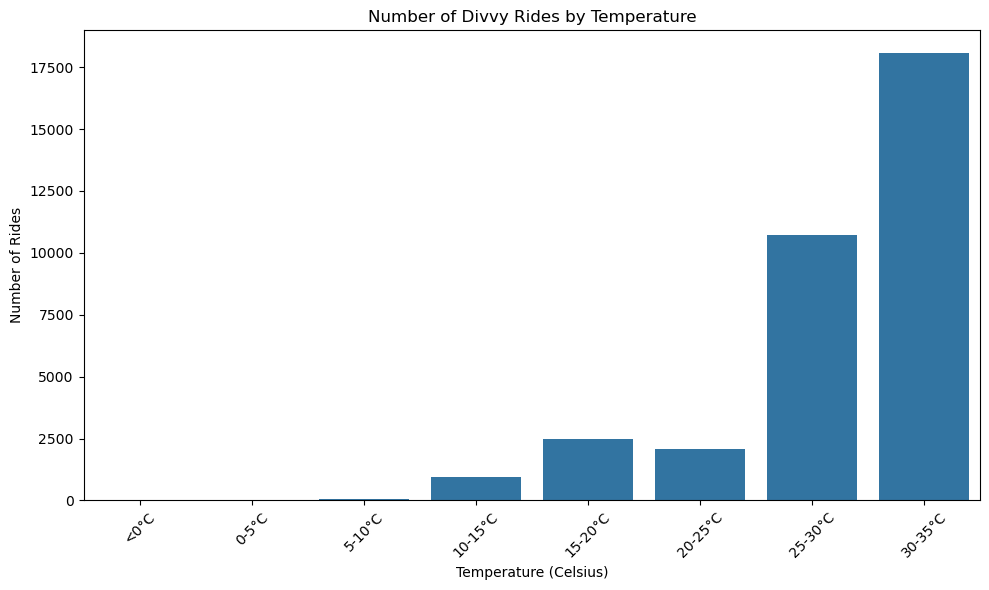

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


bins = [-10, 0, 5, 10, 15, 20, 25, 30, 35]
labels = ['<0°C', '0-5°C', '5-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C', '30-35°C']
merged['temp_bin'] = pd.cut(merged['HourlyDryBulbTemperature'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.countplot(data=merged, x='temp_bin', order=labels)
plt.title('Number of Divvy Rides by Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

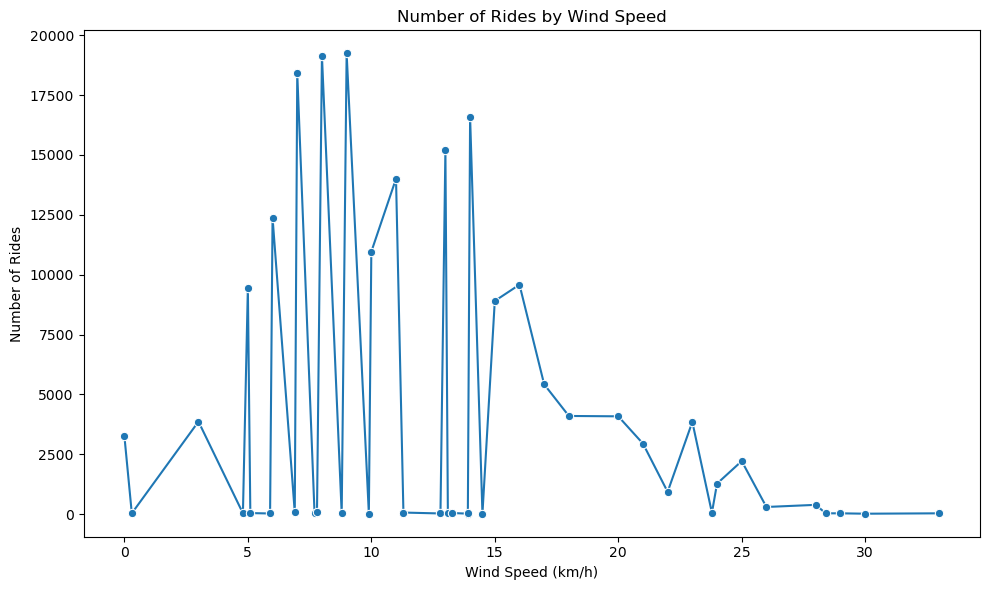

In [12]:
# Rides by Wind Speed
hourly = merged.groupby('HourlyWindSpeed').size().reset_index(name='ride_count')
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly, x='HourlyWindSpeed', y='ride_count', marker='o')
plt.title('Number of Rides by Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()

/var/folders/4m/y75glywn7fv9gqrkmt4wn0tm0000gn/T/ipykernel_74276/2789323284.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_counts = merged.groupby('precip_bin').size().reset_index(name='ride_count')


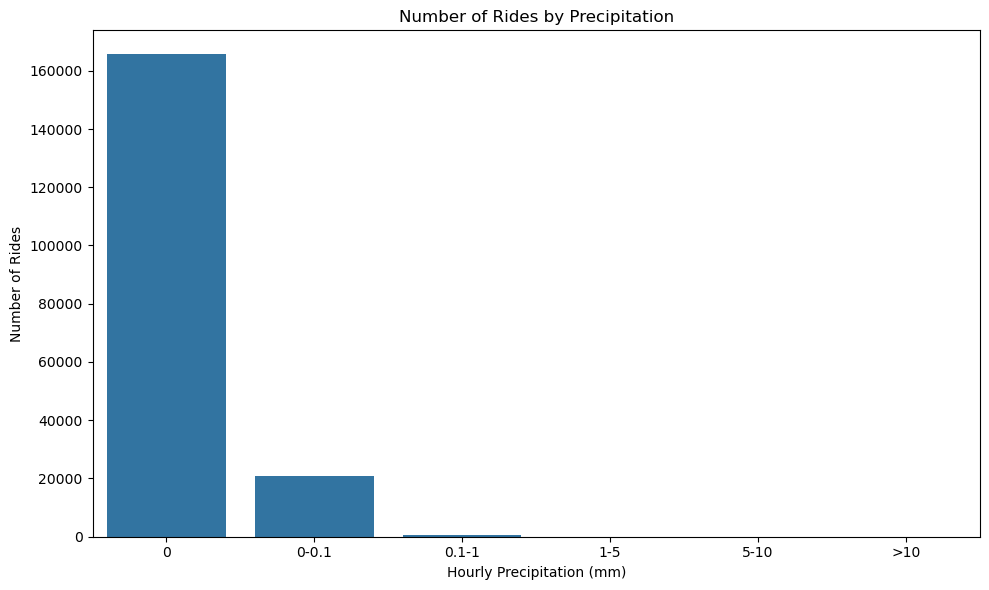

In [13]:
# Count number of rides per precipitation 
precip_bins = [-0.01, 0, 0.1, 1, 5, 10, 100]
precip_labels = ['0', '0-0.1', '0.1-1', '1-5', '5-10', '>10']
merged['precip_bin'] = pd.cut(merged['HourlyPrecipitation'], bins=precip_bins, labels=precip_labels)
precip_counts = merged.groupby('precip_bin').size().reset_index(name='ride_count')
plt.figure(figsize=(10, 6))
sns.barplot(data=precip_counts, x='precip_bin', y='ride_count')
plt.title('Number of Rides by Precipitation')
plt.xlabel('Hourly Precipitation (mm)')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()
